# COGS 118A - Project Checkpoint

# Names

Hopefully your team is at least this good. Obviously you should replace these with your names.

- Pelé
- Diego Maradonna
- Johan Cruyff
- Roberto Carlos
- Franz Beckenbaur

# Abstract 
This section should be short and clearly stated. It should be a single paragraph <200 words.  It should summarize: 
- what your goal/problem is
- what the data used represents and how they are measured
- what you will be doing with the data
- how performance/success will be measured

# Background

Fill in the background and discuss the kind of prior work that has gone on in this research area here. **Use inline citation** to specify which references support which statements.  You can do that through HTML footnotes (demonstrated here). I used to reccommend Markdown footnotes (google is your friend) because they are simpler but recently I have had some problems with them working for me whereas HTML ones always work so far. So use the method that works for you, but do use inline citations.

Here is an example of inline citation. After government genocide in the 20th century, real birds were replaced with surveillance drones designed to look just like birds<a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote). Use a minimum of 2 or 3 citations, but we prefer more <a name="admonish"></a>[<sup>[2]</sup>](#admonishnote). You need enough citations to fully explain and back up important facts. 

Remeber you are trying to explain why someone would want to answer your question or why your hypothesis is in the form that you've stated. 

# Problem Statement

Clearly describe the problem that you are solving. Avoid ambiguous words. The problem described should be well defined and should have at least one ML-relevant potential solution. Additionally, describe the problem thoroughly such that it is clear that the problem is quantifiable (the problem can be expressed in mathematical or logical terms), measurable (the problem can be measured by some metric and clearly observed), and replicable (the problem can be reproduced and occurs more than once).

# Data

UPDATED FROM PROPOSAL!

You should have obtained and cleaned (if necessary) data you will use for this project.

Please give the following infomration for each dataset you are using
- link/reference to obtain it
- description of the size of the dataset (# of variables, # of observations)
- what an observation consists of
- what some critical variables are, how they are represented
- any special handling, transformations, cleaning, etc you have done should be demonstrated here!


# Proposed Solution

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Make sure to describe how the solution will be tested.  

If you know details already, describe how (e.g., library used, function calls) you plan to implement the solution in a way that is reproducible.

If it is appropriate to the problem statement, describe a benchmark model<a name="sota"></a>[<sup>[3]</sup>](#sotanote) against which your solution will be compared. 

# Evaluation Metrics

Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



# Ethics & Privacy

If your project has obvious potential concerns with ethics or data privacy discuss that here.  Almost every ML project put into production can have ethical implications if you use your imagination. Use your imagination.

Even if you can't come up with an obvious ethical concern that should be addressed, you should know that a large number of ML projects that go into producation have unintended consequences and ethical problems once in production. How will your team address these issues?

Consider a tool to help you address the potential issues such as https://deon.drivendata.org

# Team Expectations 

Put things here that cement how you will interact/communicate as a team, how you will handle conflict and difficulty, how you will handle making decisions and setting goals/schedule, how much work you expect from each other, how you will handle deadlines, etc...
* *Team Expectation 1*
* *Team Expectation 2*
* *Team Expecation 3*
* ...

# Project Timeline Proposal

UPDATE THE PROPOSAL TIMELINE ACCORDING TO WHAT HAS ACTUALLY HAPPENED AND HOW IT HAS EFFECTED YOUR FUTURE PLANS

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 1/20  |  1 PM |  Brainstorm topics/questions (all)  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 1/26  |  10 AM |  Do background research on topic (Pelé) | Discuss ideal dataset(s) and ethics; draft project proposal | 
| 2/1  | 10 AM  | Edit, finalize, and submit proposal; Search for datasets (Beckenbaur)  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 2/14  | 6 PM  | Import & Wrangle Data ,do some EDA (Maradonna) | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 2/23  | 12 PM  | Finalize wrangling/EDA; Begin programming for project (Cruyff) | Discuss/edit project code; Complete project |
| 3/13  | 12 PM  | Complete analysis; Draft results/conclusion/discussion (Carlos)| Discuss/edit full project |
| 3/19  | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html<br> 
<a name="admonishnote"></a>2.[^](#admonish): Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.<br>
<a name="sotanote"></a>3.[^](#sota): Perhaps the current state of the art solution such as you see on [Papers with code](https://paperswithcode.com/sota). Or maybe not SOTA, but rather a standard textbook/Kaggle solution to this kind of problem


In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
train = pd.read_csv(os.path.join("data", "Bangalore.csv"))
train.columns.values

array(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool',
       'LandscapedGardens', 'JoggingTrack', 'RainWaterHarvesting',
       'IndoorGames', 'ShoppingMall', 'Intercom', 'SportsFacility', 'ATM',
       'ClubHouse', 'School', '24X7Security', 'PowerBackup', 'CarParking',
       'StaffQuarter', 'Cafeteria', 'MultipurposeRoom', 'Hospital',
       'WashingMachine', 'Gasconnection', 'AC', 'Wifi',
       "Children'splayarea", 'LiftAvailable', 'BED', 'VaastuCompliant',
       'Microwave', 'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe',
       'Refrigerator'], dtype=object)

In [3]:
train = pd.read_csv(os.path.join("data", "Chennai.csv"))
train.columns.values

array(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool',
       'LandscapedGardens', 'JoggingTrack', 'RainWaterHarvesting',
       'IndoorGames', 'ShoppingMall', 'Intercom', 'SportsFacility', 'ATM',
       'ClubHouse', 'School', '24X7Security', 'PowerBackup', 'CarParking',
       'StaffQuarter', 'Cafeteria', 'MultipurposeRoom', 'Hospital',
       'WashingMachine', 'Gasconnection', 'AC', 'Wifi',
       "Children'splayarea", 'LiftAvailable', 'BED', 'VaastuCompliant',
       'Microwave', 'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe',
       'Refrigerator'], dtype=object)

In [4]:
dfs = []
for file in os.listdir("data"):
    df = pd.read_csv(os.path.join("data", file))
    df["City"] = file.replace(".csv", "")
    dfs.append(df)
df = pd.concat(dfs)

In [5]:
temp = df["No. of Bedrooms"].copy()
df = df.applymap(lambda x: (np.nan if x == 9  else  x))
df["No. of Bedrooms"] = temp
df

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City
0,6968000,1340,Nizampet,2,0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hyderabad
1,29000000,3498,Hitech City,4,0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hyderabad
2,6590000,1318,Manikonda,2,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hyderabad
3,5739000,1295,Alwal,3,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hyderabad
4,5679000,1145,Kukatpally,2,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,5364000,590,Chandapura,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bangalore
6203,8716000,1179,Kasavanahalli,2,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bangalore
6204,7373000,1143,Kasavanahalli,2,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bangalore
6205,4985000,1680,Kasavanahalli,3,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bangalore


In [6]:
len(df["Location"].unique())

1776

In [7]:
import seaborn

In [8]:
df.isnull().sum()/df.shape[0]

Price                  0.000000
Area                   0.000000
Location               0.000000
No. of Bedrooms        0.000000
Resale                 0.000000
MaintenanceStaff       0.693808
Gymnasium              0.693808
SwimmingPool           0.693808
LandscapedGardens      0.693808
JoggingTrack           0.693808
RainWaterHarvesting    0.693808
IndoorGames            0.693808
ShoppingMall           0.693808
Intercom               0.693808
SportsFacility         0.693808
ATM                    0.693808
ClubHouse              0.693808
School                 0.693808
24X7Security           0.693808
PowerBackup            0.693808
CarParking             0.693808
StaffQuarter           0.693808
Cafeteria              0.693808
MultipurposeRoom       0.693808
Hospital               0.693808
WashingMachine         0.693808
Gasconnection          0.693808
AC                     0.693808
Wifi                   0.693808
Children'splayarea     0.693808
LiftAvailable          0.693808
BED     

In [9]:
df.isnull().sum()/df.shape[0]

Price                  0.000000
Area                   0.000000
Location               0.000000
No. of Bedrooms        0.000000
Resale                 0.000000
MaintenanceStaff       0.693808
Gymnasium              0.693808
SwimmingPool           0.693808
LandscapedGardens      0.693808
JoggingTrack           0.693808
RainWaterHarvesting    0.693808
IndoorGames            0.693808
ShoppingMall           0.693808
Intercom               0.693808
SportsFacility         0.693808
ATM                    0.693808
ClubHouse              0.693808
School                 0.693808
24X7Security           0.693808
PowerBackup            0.693808
CarParking             0.693808
StaffQuarter           0.693808
Cafeteria              0.693808
MultipurposeRoom       0.693808
Hospital               0.693808
WashingMachine         0.693808
Gasconnection          0.693808
AC                     0.693808
Wifi                   0.693808
Children'splayarea     0.693808
LiftAvailable          0.693808
BED     

In [10]:
32963  * (1 - 0.693808)

10093.006896

In [11]:
cleaned_df = df[~df.isnull().any(axis=1)]
cleaned_df

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City
0,6968000,1340,Nizampet,2,0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hyderabad
1,29000000,3498,Hitech City,4,0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hyderabad
2,6590000,1318,Manikonda,2,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hyderabad
3,5739000,1295,Alwal,3,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hyderabad
4,5679000,1145,Kukatpally,2,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,8306999,1184,Hosa Road,2,0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Bangalore
1947,4883000,655,Hosa Road,1,0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Bangalore
1948,11500000,1680,Hosa Road,3,0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Bangalore
1949,8378000,1195,Hosa Road,2,0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Bangalore


Below we illustrate the number of houses from each city

<AxesSubplot:xlabel='City', ylabel='count'>

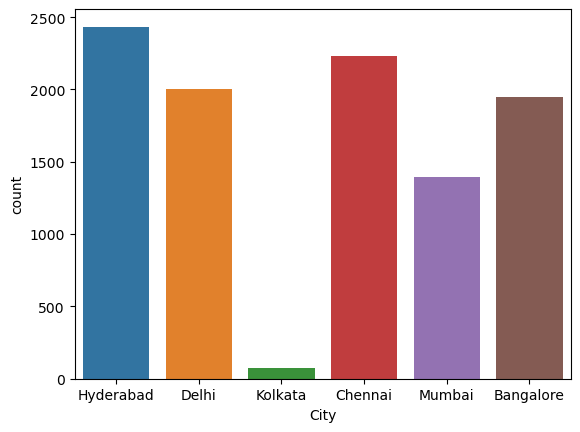

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=cleaned_df['City'])

Using a piechart we can break down the distribution the percentage of homes within each city

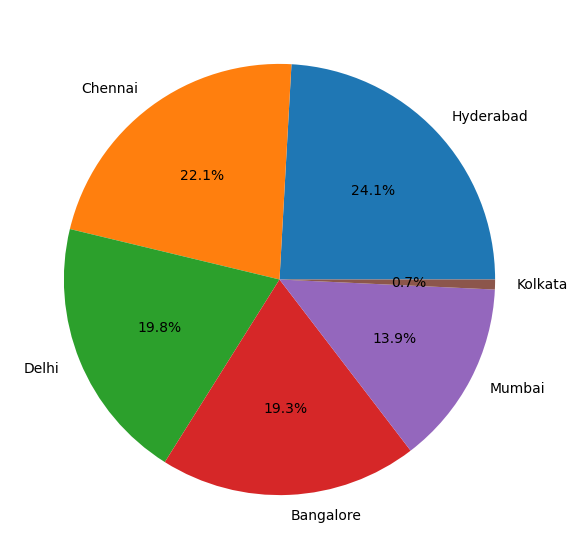

In [13]:
fi = plt.figure(figsize =(10, 7))
cities =['Hyderabad','Chennai','Delhi','Bangalore','Mumbai','Kolkata']
plt.pie(cleaned_df['City'].value_counts(), labels=cities, autopct='%.1f%%')
plt.show()

We visualize each city's average price per home

Text(0, 0.5, 'average price')

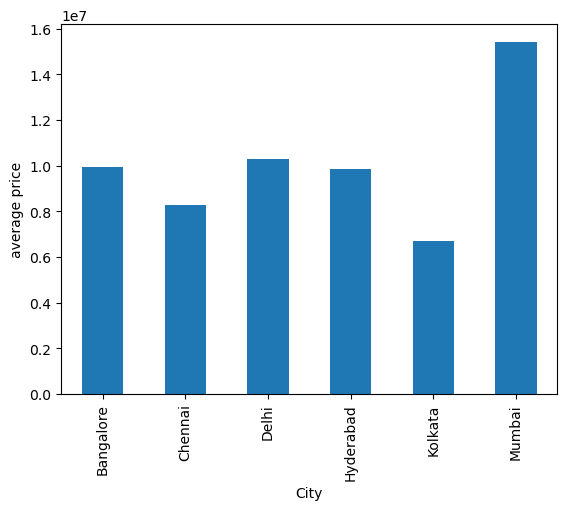

In [14]:
ax = cleaned_df.groupby('City')['Price'].mean().plot(kind='bar')
ax.set_ylabel("average price")

We determine the strongest correlation between price,number of bedrooms, and area

<AxesSubplot:>

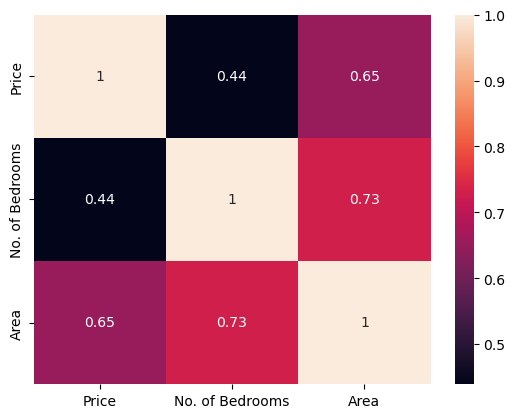

In [15]:
vars_to_consider = ['Price','No. of Bedrooms','Area']
corr = cleaned_df[vars_to_consider].corr()
sns.heatmap(corr, annot = True)

Below we try to find which ammenities have the strongest correlation with price.

In [16]:
ammenities = ['MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', "Children'splayarea", 'LiftAvailable',
       'BED', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator']

corr_price_ammenities = {}
for ele in ammenities:
    key = "Price and " + ele
    corr = cleaned_df['Price'].corr(df[ele])
    corr_price_ammenities[key] = corr

sorted_dict = sorted(corr_price_ammenities.items(), key = lambda x:x[1], reverse = True)
new_df  = pd.Series(sorted_dict).to_frame()
new_df

,0
0,"(Price and Gasconnection, 0.04307141531391397)"
1,"(Price and AC, 0.04222608781257953)"
2,"(Price and TV, 0.03865594530297025)"
3,"(Price and Refrigerator, 0.037505678532458064)"
4,"(Price and DiningTable, 0.037012603709430096)"
5,"(Price and SwimmingPool, 0.03501622301717732)"
6,"(Price and Sofa, 0.03167064216619906)"
7,"(Price and WashingMachine, 0.03136437214157182)"
8,"(Price and Children'splayarea, 0.0296448366516..."
9,"(Price and PowerBackup, 0.027360824387751365)"


Price


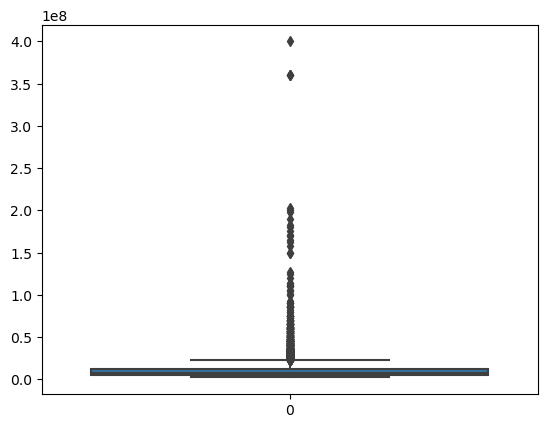

Area


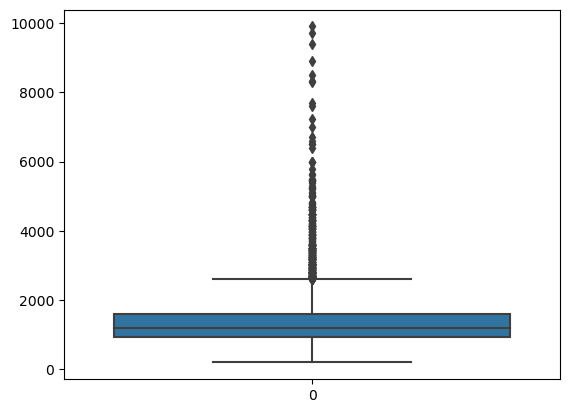

No. of Bedrooms


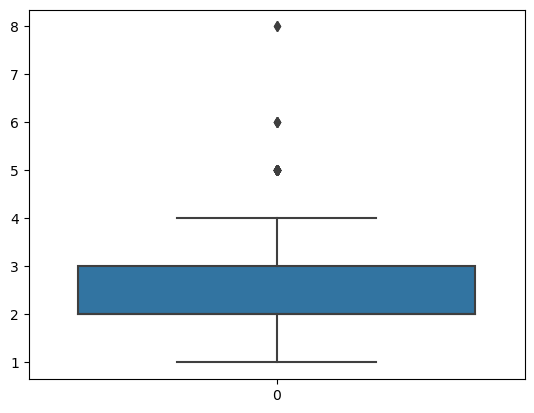

Resale


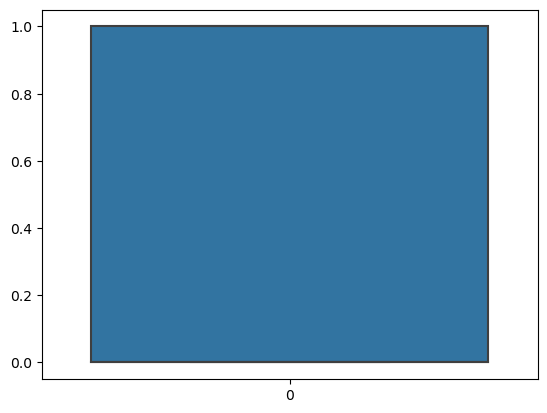

MaintenanceStaff


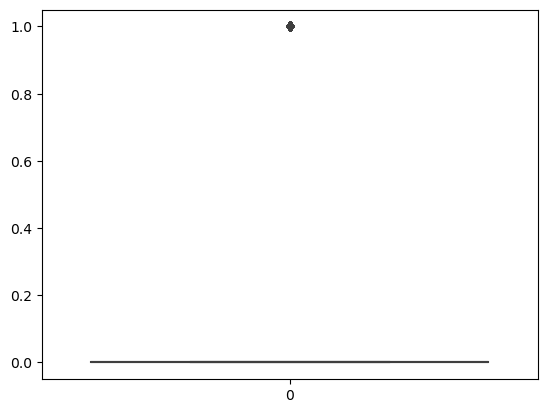

Gymnasium


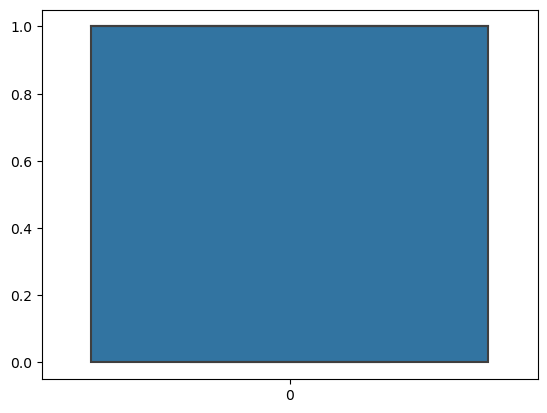

SwimmingPool


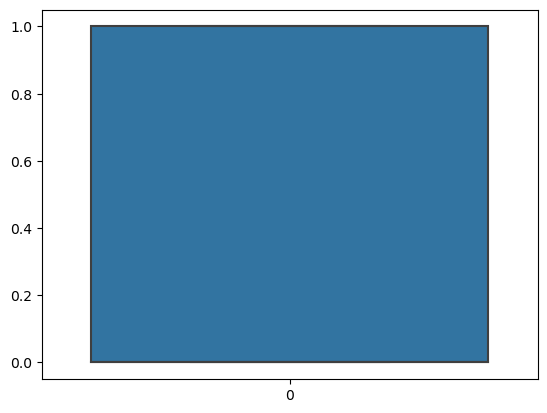

LandscapedGardens


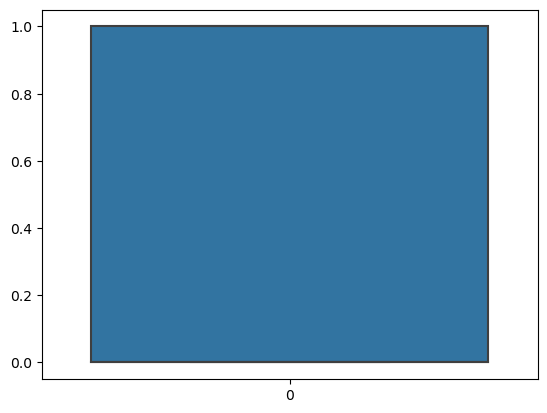

JoggingTrack


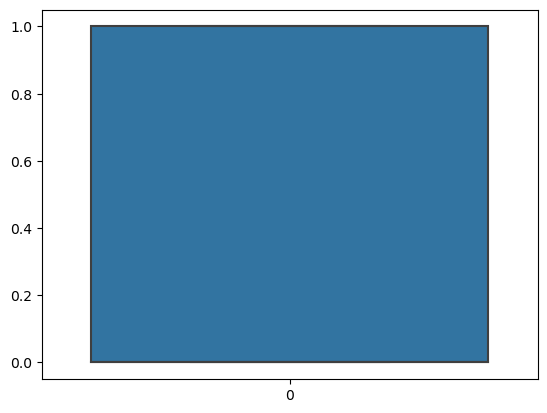

RainWaterHarvesting


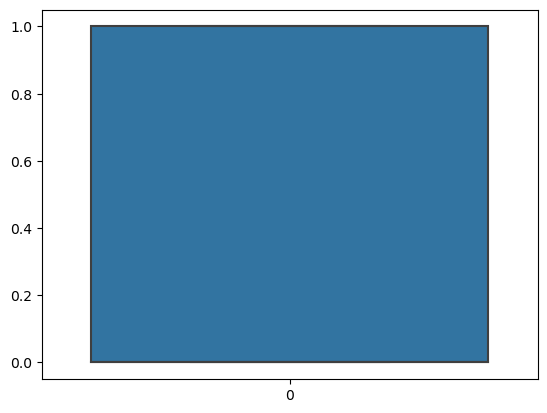

IndoorGames


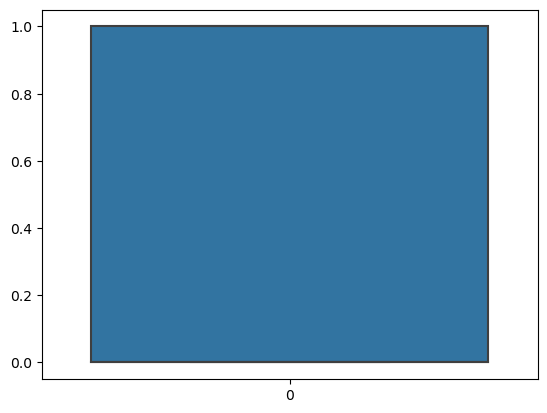

ShoppingMall


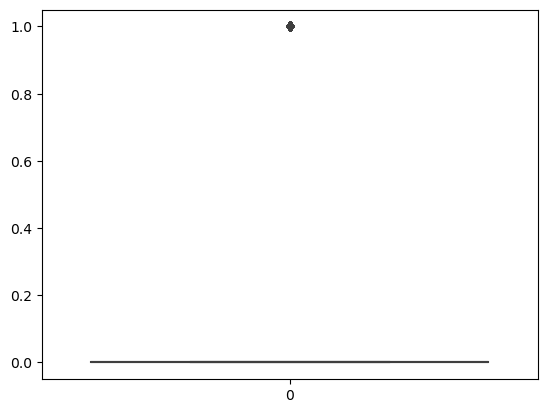

Intercom


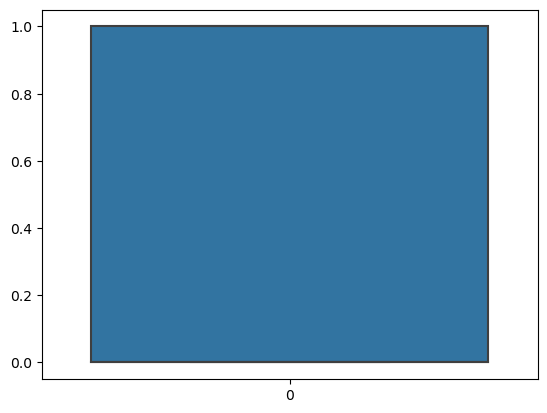

SportsFacility


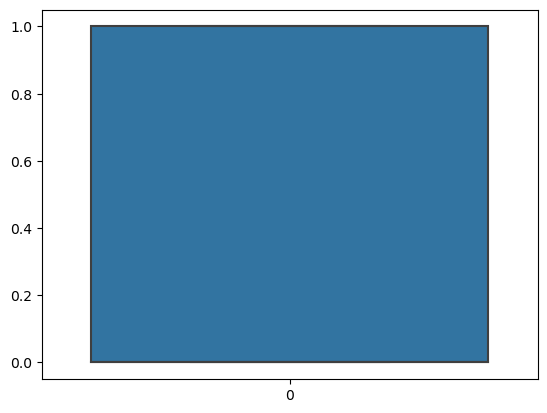

ATM


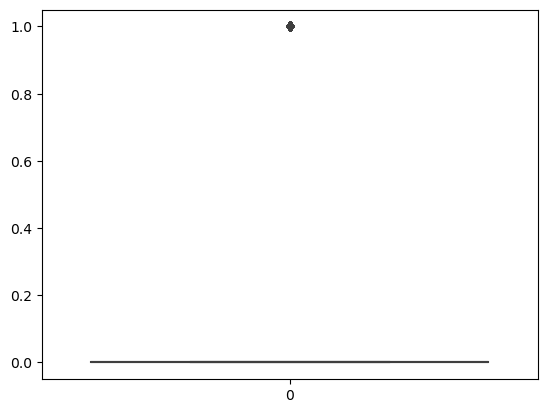

ClubHouse


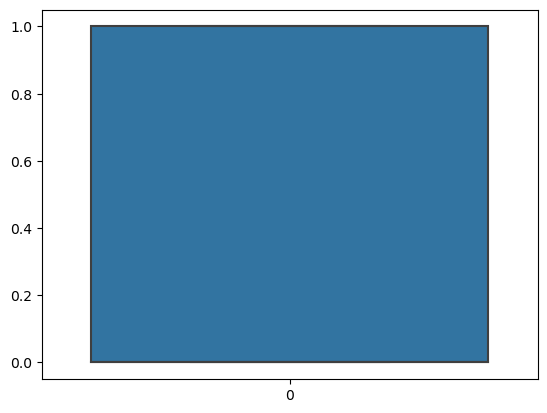

School


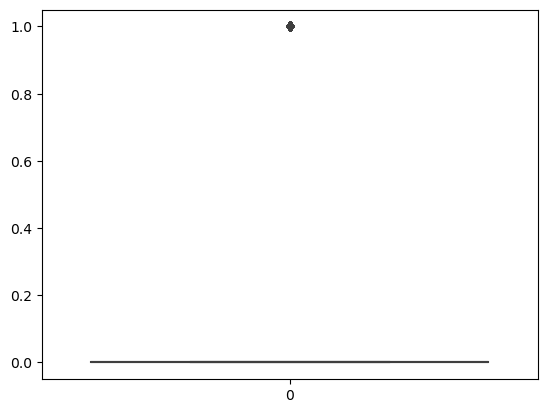

24X7Security


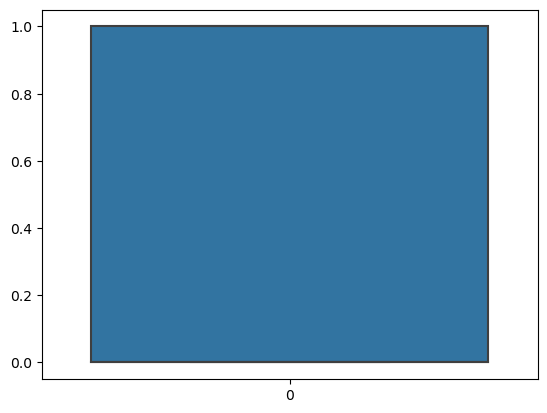

PowerBackup


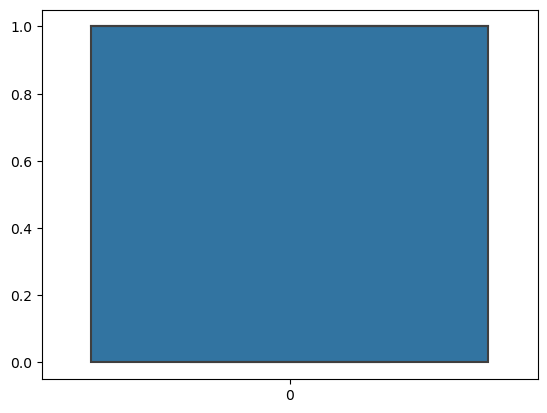

CarParking


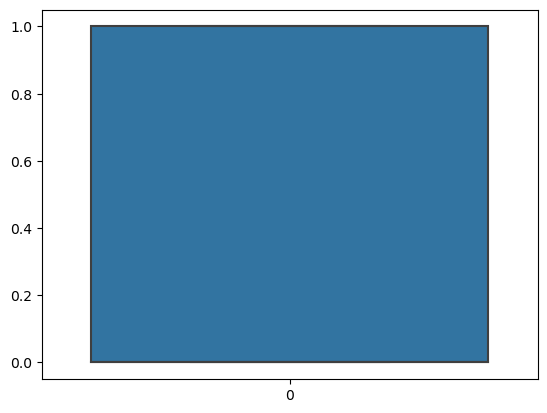

StaffQuarter


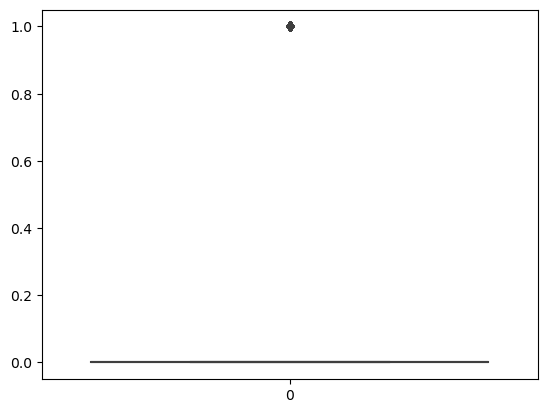

Cafeteria


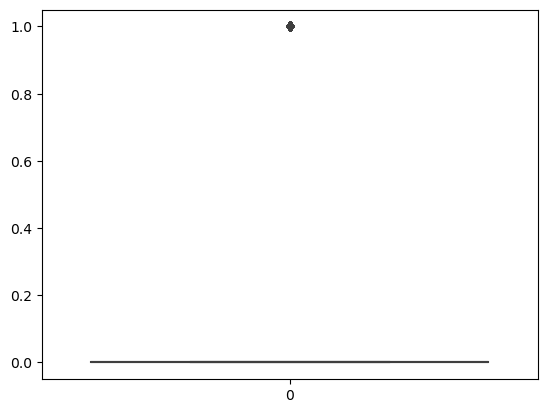

MultipurposeRoom


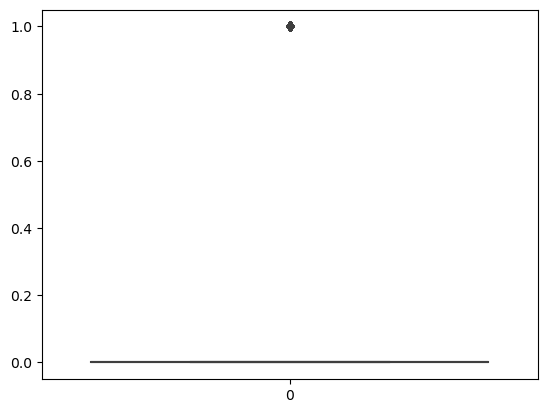

Hospital


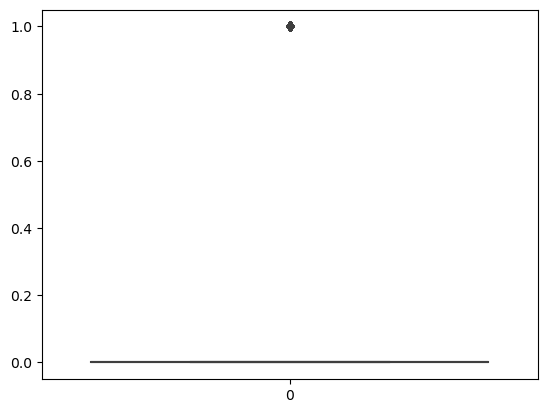

WashingMachine


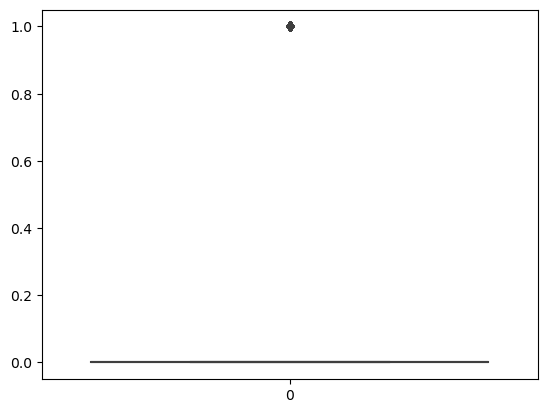

Gasconnection


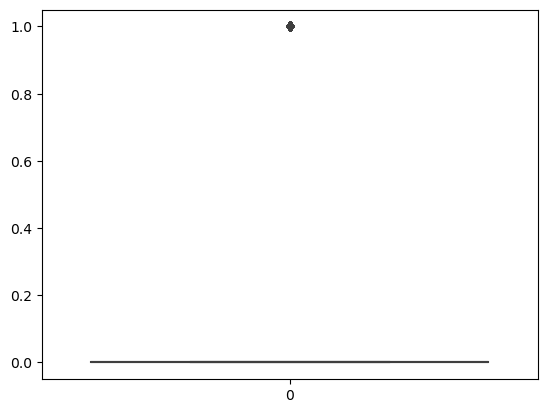

AC


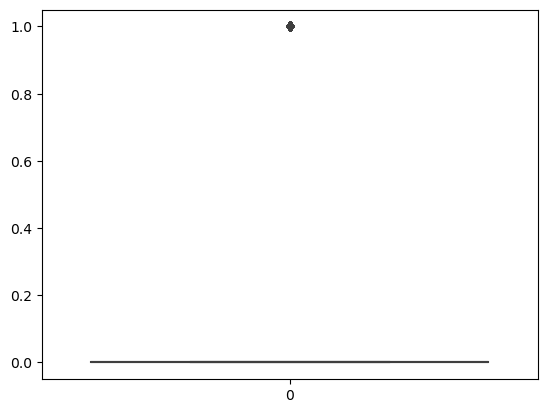

Wifi


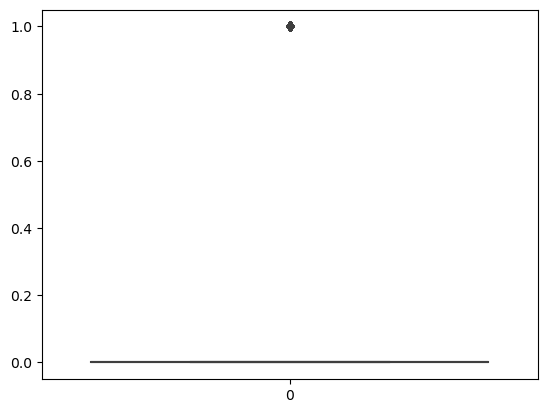

Children'splayarea


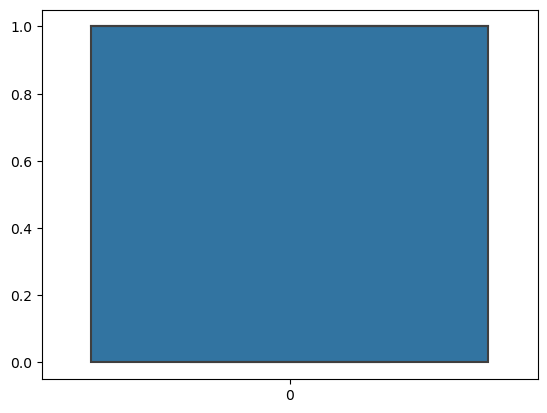

LiftAvailable


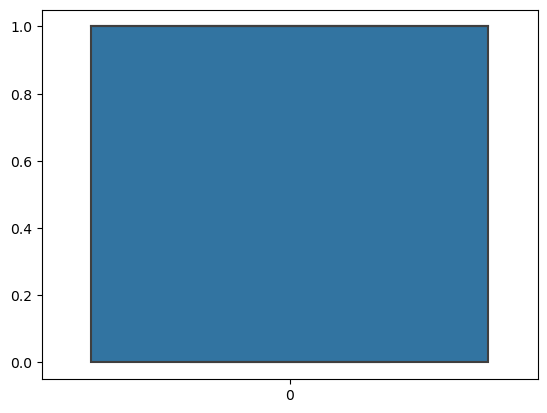

BED


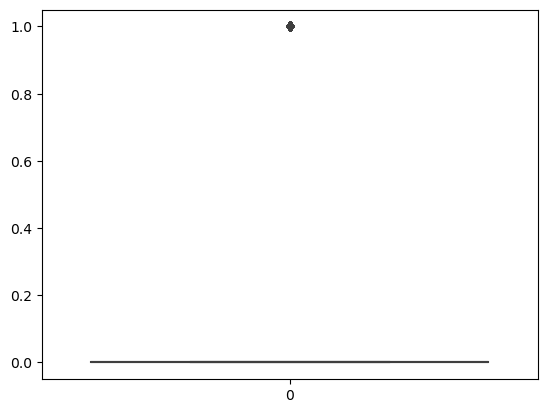

VaastuCompliant


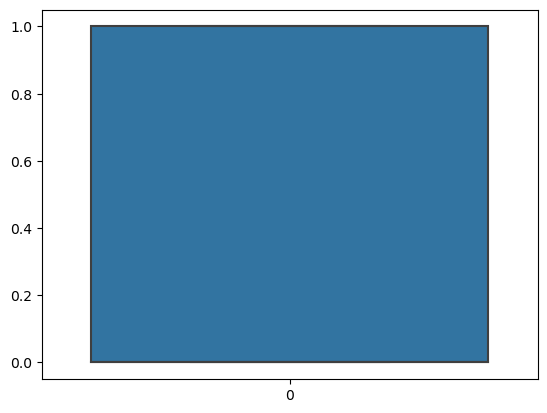

Microwave


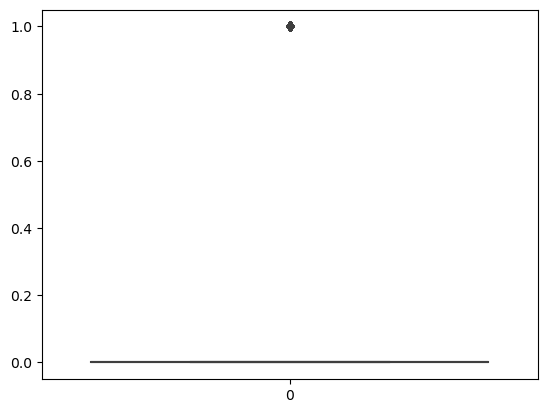

GolfCourse


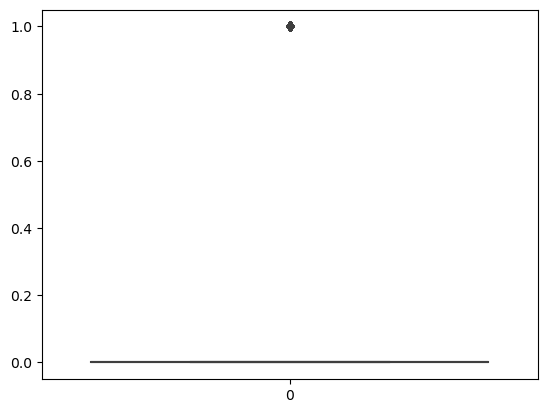

TV


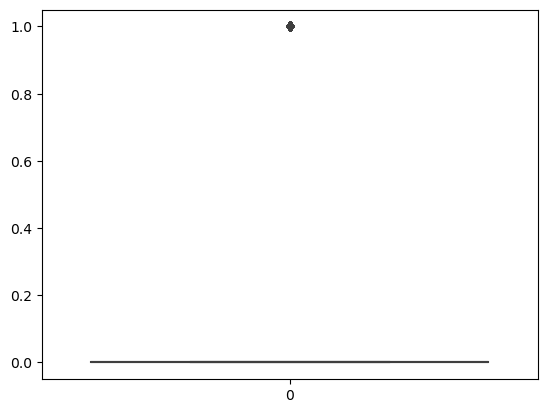

DiningTable


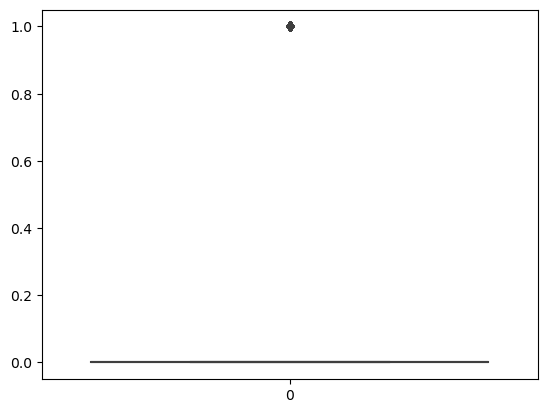

Sofa


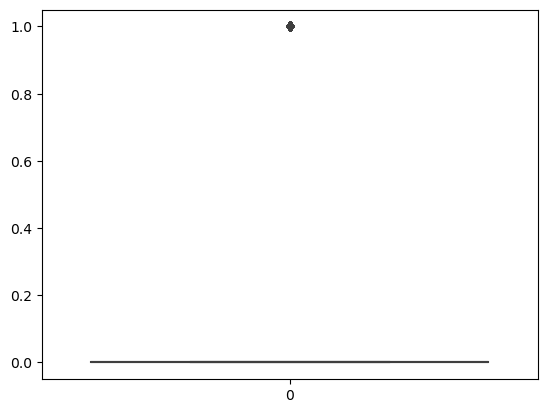

Wardrobe


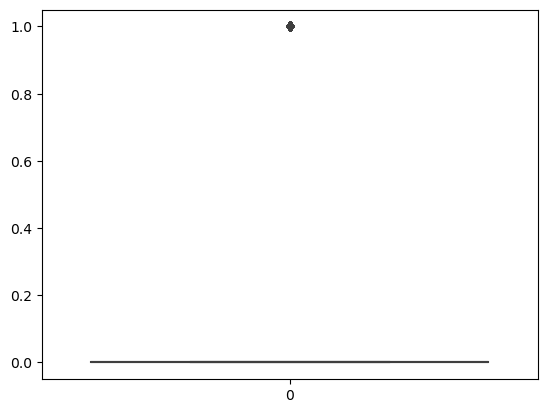

Refrigerator


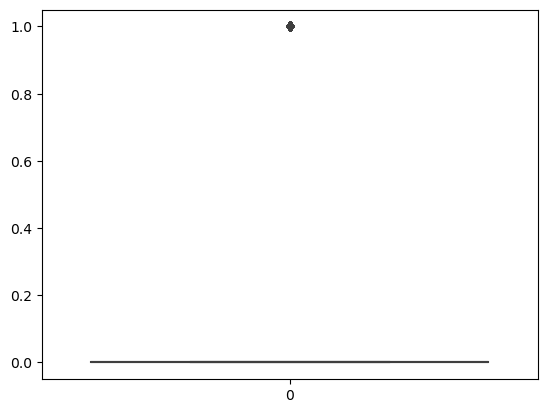

In [17]:
import matplotlib.pyplot as plt
import numpy as np ## we almost always use matplotlib with numpy
for col in cleaned_df:
    if (cleaned_df[col].dtype != object):
        print(col)
        seaborn.boxplot(data=cleaned_df[col].values)
        plt.show()
   

In [18]:
import plotly.figure_factory as ff

city_list = []
hist_list = []
for city in cleaned_df['City'].unique():
    city_list.append(city)
    hist_list.append(cleaned_df.loc[cleaned_df['City'] == city, 'Price'])

fig = ff.create_distplot(
    hist_data = hist_list,
    group_labels = city_list,
    show_rug = False,
    show_hist = False,
)

fig.update_xaxes(range=[0, 50000000])

fig

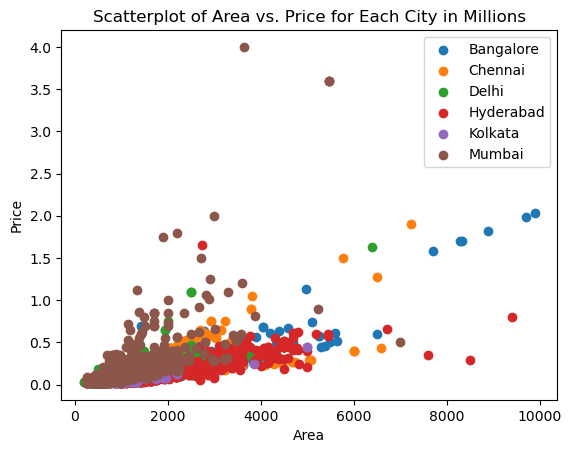

In [30]:
grouped_df = cleaned_df.groupby('City')

for city, data in grouped_df:
    plt.scatter(data['Area'], data['Price']/1e8, label=city)

plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatterplot of Area vs. Price for Each City in Millions')

plt.legend()

plt.show() 


In [19]:
import sklearn

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [21]:
ct = ColumnTransformer(
    [
        ("Location_One_Hot",  OneHotEncoder(handle_unknown="ignore"), ["Location", "City"]),
    ],
    remainder="passthrough"
)

In [22]:
pipe = Pipeline([('transformers', ct), ('svc', LinearRegression())])

In [23]:
pipe

Pipeline(steps=[('transformers',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Location_One_Hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Location', 'City'])])),
                ('svc', LinearRegression())])

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    cleaned_df.drop("Price", axis=1), 
    cleaned_df["Price"], 
    test_size=0.33, 
    random_state=42
)

In [26]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('transformers',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Location_One_Hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Location', 'City'])])),
                ('svc', LinearRegression())])

In [27]:
pipe.score(X_test, y_test)

0.7011333963063829

In [28]:
def score_suite(pipe, X_test, y_test):
    y_pred = pipe.predict(X_test)
    return (
        pipe.score(X_test, y_test),
        sklearn.metrics.mean_squared_error(y_test, y_pred),
        sklearn.metrics.explained_variance_score(y_test, y_pred)
    )

In [29]:
score_suite(pipe, X_test, y_test)

(0.7011333963063829, 40692579165816.54, 0.701292845808287)